In [1]:
#This code is used to import the required libraries for prediction
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix, parallel_coordinates
import networkx as nx
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib as plt
import seaborn as sns

In [11]:
#This code is used to read the stroke dataset
stroke_df =  pd.read_csv('C:\Users\gangu\Downloads\stroke_data.csv')

In [12]:
#This code is used to print the top 5 rows
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1


# EDA

In [ ]:
# This code is used to get the mean, standard deviation, minimum and maximum
# values
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
#This code is used to print the data types
stroke_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [15]:
#This code is used to print the null values
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Data Preprocessing(Data Cleaning)

In [16]:
#This code is used to fill the null values with median
stroke_df['bmi'] = stroke_df['bmi'].fillna(stroke_df['bmi'].median())
stroke_df['bmi']

0       36.6
1       28.1
2       32.5
3       34.4
4       24.0
        ... 
5105    28.1
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [17]:
stroke_df.isnull().sum().sum()

0

In [18]:
#This code is to print to print unique values in the column
stroke_df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [19]:
#This code is to print to print unique values in the column
stroke_df['gender'] = stroke_df['gender'].replace('Other', np.nan)
stroke_df['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [20]:
#This code is used to fill the unknown values in gender with mode
stroke_df['gender'] = stroke_df['gender'].fillna(stroke_df['gender'].mode()[0])
sorted(stroke_df['gender'].unique())

['Female', 'Male']

In [ ]:
#This code is used to print the number of characters in column
stroke_df['gender'].value_counts()

gender
Female    2995
Male      2115
Name: count, dtype: int64

In [ ]:
#This code is used to print the number of characters in column
#This code is used to replace unknown values with nan
stroke_df['smoking_status'] = stroke_df['smoking_status'].replace('Unknown', np.nan)
stroke_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', nan], dtype=object)

In [ ]:
#This code is used to fill the unknown values in smoking status with mode
stroke_df['smoking_status'] = stroke_df['smoking_status'].fillna(stroke_df['smoking_status'].mode()[0])
sorted(stroke_df['smoking_status'].unique())

['formerly smoked', 'never smoked', 'smokes']

In [21]:
#This code is used to print the number of characters in column
stroke_df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [22]:
#This code is used to print the number of characters in column
stroke_df['age'].value_counts()

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

In [23]:
#This code is used to print the number of characters in column
stroke_df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [24]:
#This code is used to print the number of characters in column
stroke_df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [25]:
#This code is used to print the number of characters in column
stroke_df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [26]:
#This code is used to print the number of characters in column
stroke_df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [27]:
#This code is used to print the number of characters in column
stroke_df['avg_glucose_level'].value_counts()

avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: count, Length: 3979, dtype: int64

In [28]:
#This code is used to print the number of characters in column
stroke_df['bmi'].value_counts()

bmi
28.1    230
28.7     41
28.4     38
26.7     37
27.6     37
       ... 
48.7      1
49.2      1
51.0      1
49.4      1
14.9      1
Name: count, Length: 418, dtype: int64

In [29]:
#This code is used to print the number of characters in column
stroke_df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<ipython-input-30-082e481bf4aa>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'age'),
 Text(1, 0, 'hypertension'),
 Text(2, 0, 'heart_disease'),
 Text(3, 0, 'avg_glucose_level'),
 Text(4, 0, 'bmi'),
 Text(5, 0, 'stroke')]

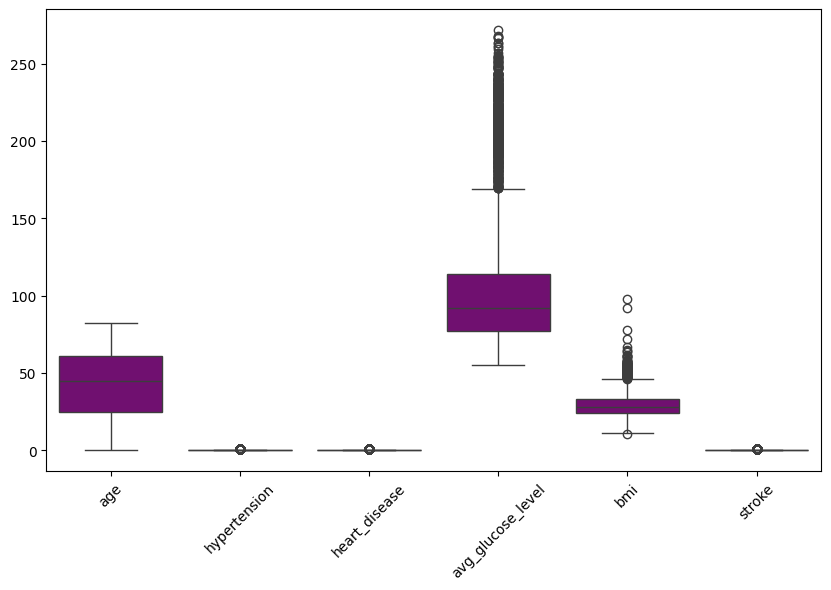

In [30]:
#This code is used to plot the boxplots for the variables
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data = stroke_df,color = 'purple')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


In [31]:
#This code is used to print the outliers
Q1 = stroke_df['bmi'].quantile(0.25)
Q3 = stroke_df['bmi'].quantile(0.75)
IQR = Q3 - Q1
da=(stroke_df['bmi'] < (Q1 - 1.5 * IQR)) | (stroke_df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

bmi
False    4984
True      126
Name: count, dtype: int64

In [32]:
#This code is used to fill the null values with median
stroke_df['bmi']=stroke_df['bmi'].fillna(stroke_df['bmi'].median())
stroke_df['bmi']

0       36.6
1       28.1
2       32.5
3       34.4
4       24.0
        ... 
5105    28.1
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [33]:
#This code is used to print the outliers
Q1 = stroke_df['avg_glucose_level'].quantile(0.25)
Q3 = stroke_df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(stroke_df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (stroke_df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

avg_glucose_level
False    4483
True      627
Name: count, dtype: int64

In [34]:
#This code is used to fill the null values with median
stroke_df['avg_glucose_level']=stroke_df['avg_glucose_level'].fillna(stroke_df['avg_glucose_level'].median())
stroke_df['avg_glucose_level']

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64

In [35]:
#This code is used to print the data types
stroke_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<Axes: xlabel='stroke', ylabel='count'>

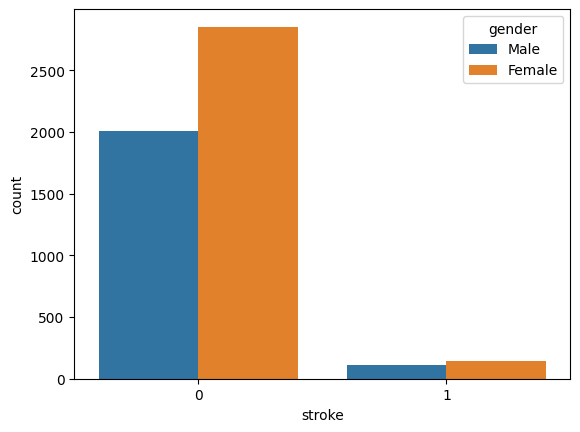

In [36]:
#This code is used to print the count plot
sns.countplot(x='stroke', hue='gender', data=stroke_df)

<Axes: xlabel='stroke', ylabel='count'>

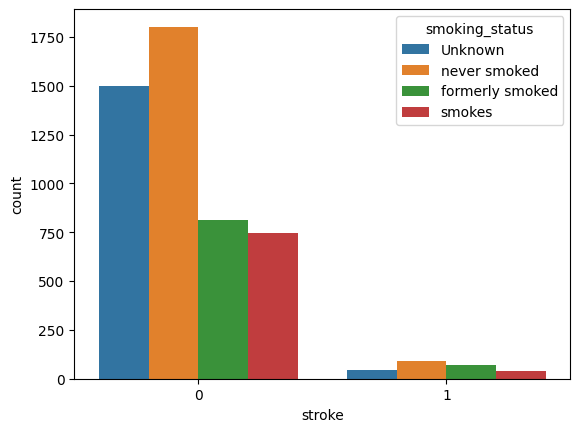

In [37]:
#This code is used to print the count plot
sns.countplot(x='stroke', hue='smoking_status', data=stroke_df)

<Axes: xlabel='stroke', ylabel='count'>

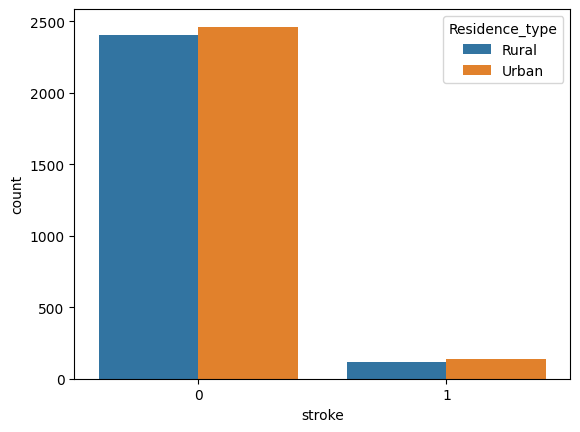

In [38]:
#This code is used to print the count plot
sns.countplot(x='stroke', hue='Residence_type', data=stroke_df)

<Axes: xlabel='stroke', ylabel='count'>

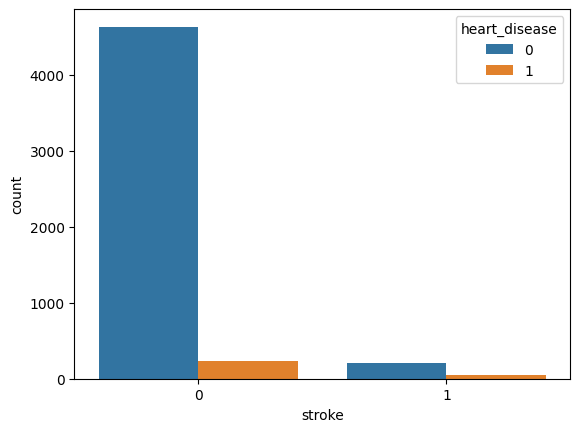

In [39]:
#This code is used to print the count plot
sns.countplot(x='stroke', hue='heart_disease', data=stroke_df)

<Axes: xlabel='stroke', ylabel='count'>

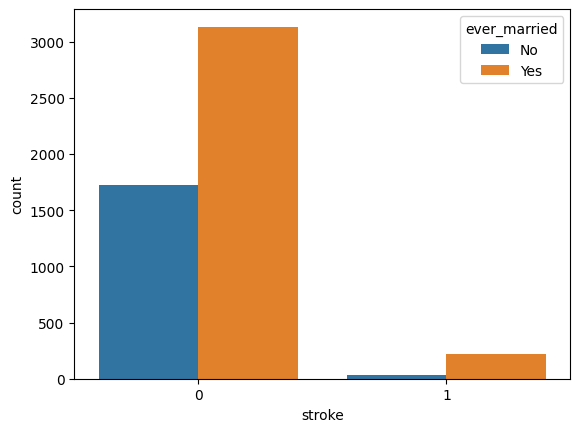

In [40]:
#This code is used to print the count plot
sns.countplot(x='stroke', hue='ever_married', data=stroke_df)

In [41]:
# Check for non-numeric values in each column
for column in stroke_df.columns:
    if stroke_df[column].dtype == 'object':
        print(f"Column '{column}' contains non-numeric values.")


Column 'gender' contains non-numeric values.
Column 'ever_married' contains non-numeric values.
Column 'Residence_type' contains non-numeric values.
Column 'smoking_status' contains non-numeric values.


In [42]:
#This code is used to convert categorical columns to binary
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each categorical column and convert it to numeric
categorical_columns = ['gender', 'ever_married', 'Residence_type', 'smoking_status']
for column in categorical_columns:
    stroke_df[column] = label_encoder.fit_transform(stroke_df[column])

<Axes: >

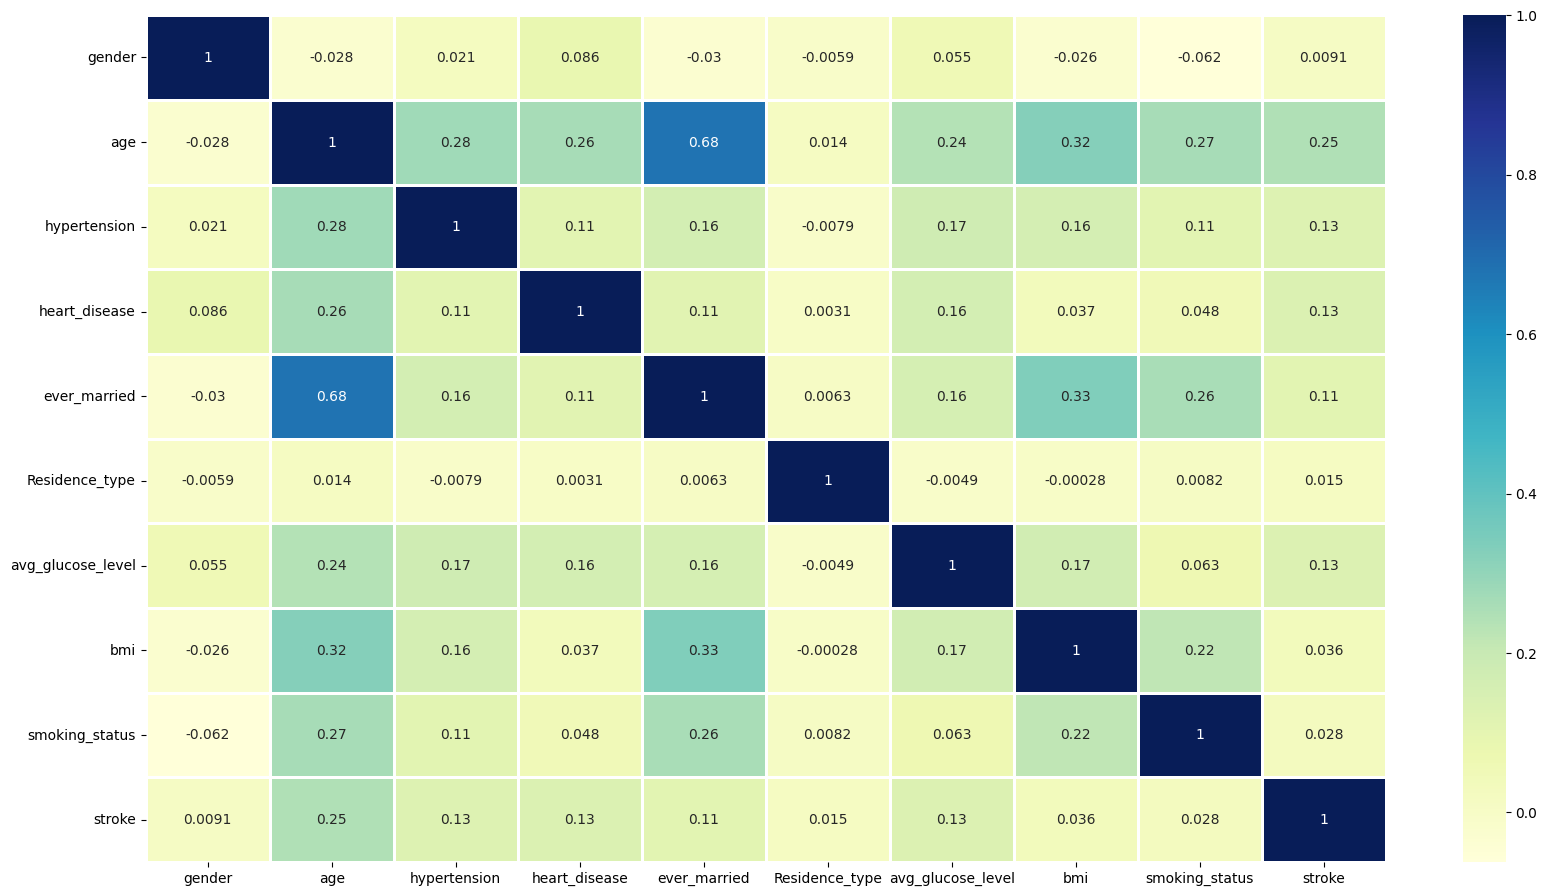

In [43]:
#This code is used to print the correlation matrix
corr=stroke_df.corr()
f,ax=plt.subplots(figsize=(20,11))
sns.heatmap(corr,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

In [45]:
#This code is used to print the top 5 rows
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1,1
1,0,61.0,0,0,1,0,202.21,28.1,2,1
2,1,80.0,0,1,1,0,105.92,32.5,2,1
3,0,49.0,0,0,1,1,171.23,34.4,3,1
4,0,79.0,1,0,1,0,174.12,24.0,2,1


In [47]:
#This code is used for oversampling
import pandas as pd
import numpy as np

# Assuming df contains your dataset
X = stroke_df.drop(['stroke'], axis=1)
y = stroke_df['stroke']

# Separate majority and minority classes
df_majority = stroke_df[stroke_df['stroke'] == 0]
df_minority = stroke_df[stroke_df['stroke'] == 1]

# Upsample minority class
df_minority_upsampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Separate features and target variable
X_over = df_upsampled.drop(['stroke'], axis=1)
y_over = df_upsampled['stroke']

X_over
y_over

249    0
250    0
251    0
252    0
253    0
      ..
178    1
174    1
238    1
3      1
134    1
Name: stroke, Length: 9722, dtype: int64

In [48]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
stroke_df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(stroke_df[['bmi', 'avg_glucose_level', 'age']])

In [49]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [50]:
# Checking the size of the splits
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7777, 9)
y_train: (7777,)
X_test: (1945, 9)
y_test: (1945,)


In [51]:
#This code is used to import operating systems
import os
graph_path = 'C:/Users/mo0354/windows_10_msbuild_Release_graphviz-9.0.0-win32/Graphviz/bin'
os.environ["PATH"] += os.pathsep + graph_path

In [53]:
#This code is used to install datamining business analytics
!pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 32.5 MB/s eta 0:00:00


In [54]:
from dmba import plotDecisionTree, classificationSummary, regressionSummary

Colab environment detected.


Accuracy: 0.7984575835475578
ROC AUC Score: 0.801100349505361


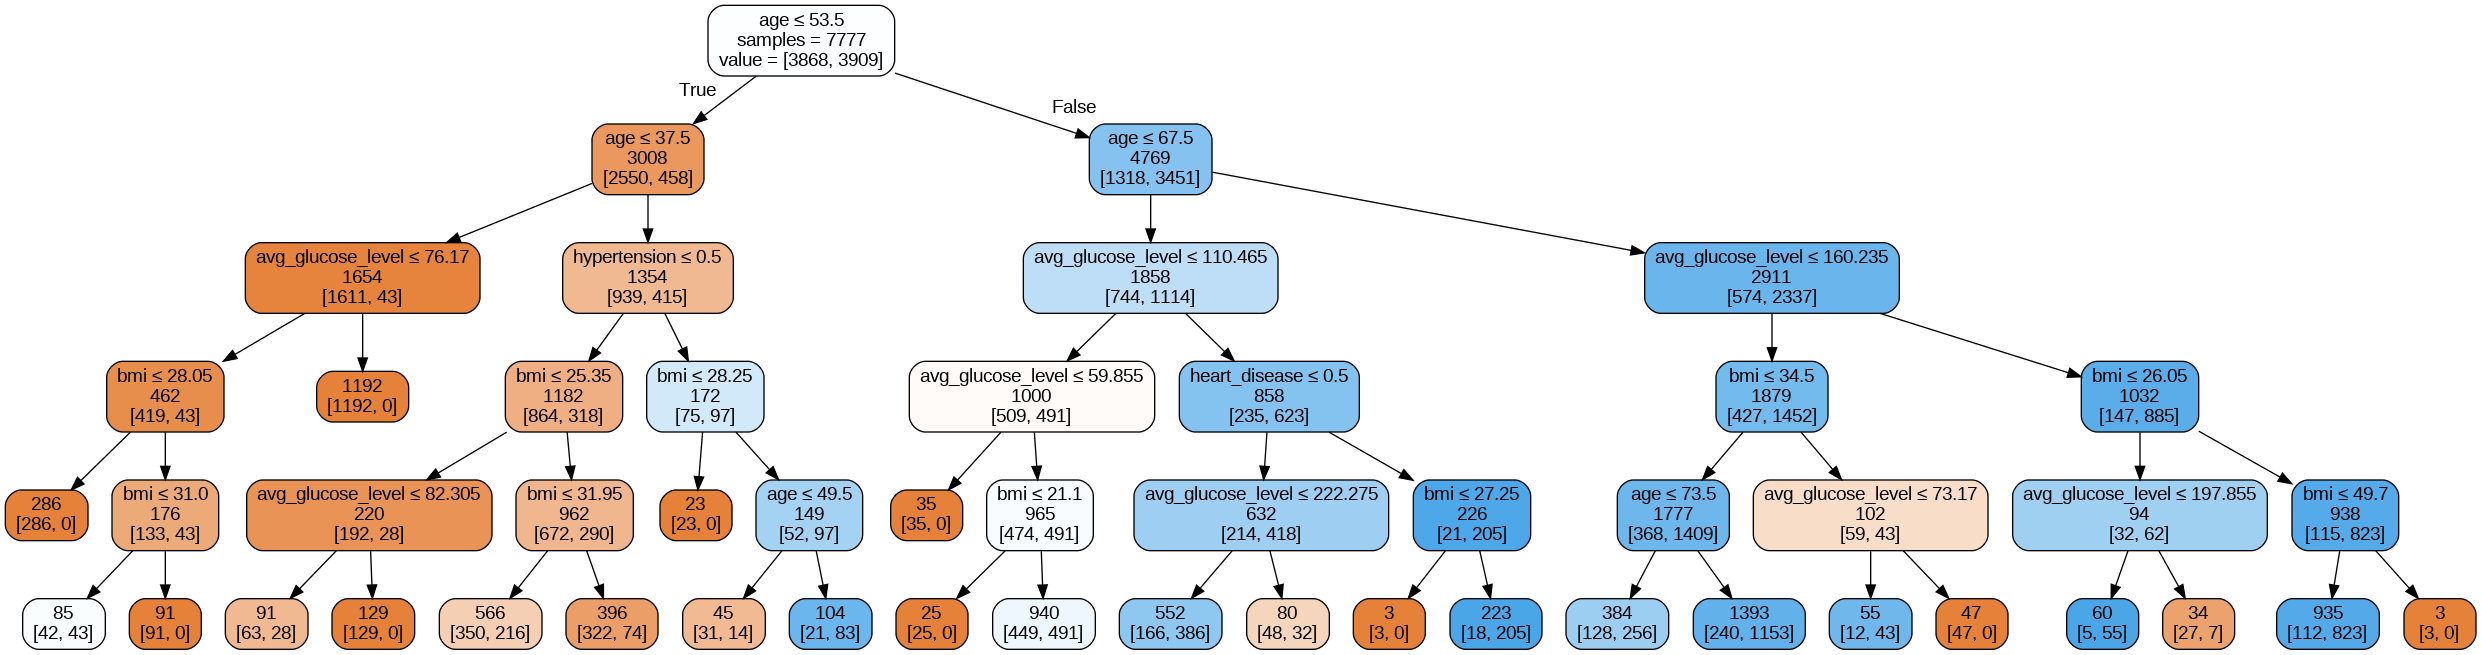

In [55]:
#importing the Decision Tree Classifier module
from sklearn.tree import DecisionTreeClassifier
# Libraries for calculating performance metrics
from sklearn import metrics
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
clf = DecisionTreeClassifier(criterion="entropy",random_state=1000,max_depth=5,min_samples_leaf=3)

# Training the classifier
clf = clf.fit(X_train,y_train)

#predicting result using the test dataset
y_pred = clf.predict(X_test)

# Printing the accuracyof the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))


plotDecisionTree(clf, feature_names=X_train.columns)

In [56]:
#importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

Accuracy: 0.9701799485861182
ROC AUC Score: 0.9707955689828801


In [57]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred_lr = classifier.predict(X_test)

confusion_matrix(y_test, y_pred_lr)
print('Accuracy:', accuracy_score(y_test, y_pred_lr))

Accuracy: 0.7845758354755784


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Naive Bayes classifier
nb_clf = GaussianNB()

# Train the classifier
nb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.7604113110539846


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
et_classifier = ExtraTreesClassifier(random_state=42)

# Train the classifier
et_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = et_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9928020565552699


In [60]:
gender=1
age=75
hypertension=1
heart_disease=1
ever_married=1
Residence_type=1
avg_glucose_level=300
bmi=36.6
smoking_status=1

input_features = [gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status]

features_value = [np.array(input_features)]
features_name = ['gender','age','hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','smoking_status']

df = pd.DataFrame(features_value, columns=features_name)
prediction = knn.predict(df)[0]
print(prediction)

1


Confusion Matrix:
               False Negative  False Positive
True Negative             851             142
True Positive               0             952


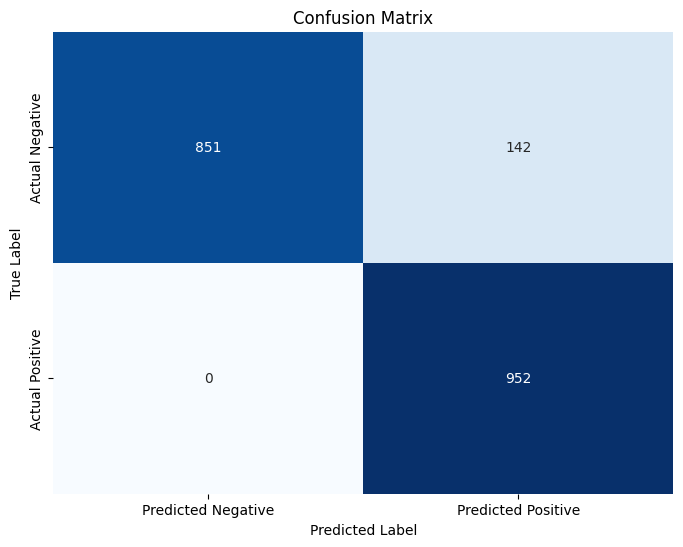

In [61]:
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to DataFrame for visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True Negative', 'True Positive'], columns=['False Negative', 'False Positive'])

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix_df)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [62]:
knn_classifier = KNeighborsClassifier()

# Generate classification report
report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       993
           1       0.87      1.00      0.93       952

    accuracy                           0.93      1945
   macro avg       0.94      0.93      0.93      1945
weighted avg       0.94      0.93      0.93      1945

